# Make line plot for app 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
index_vars = ['location_name', 'year_id']
df = pd.read_csv('../data/processed/GBD_child_health_indicators.csv')
location_metadata = pd.read_csv('../data/metadata/gbd_location_metadata.csv')

In [4]:
df_wide = df.pivot_table(index=['location_name', 'year_id'], columns='indicator', values='val').reset_index()
df_wide = pd.merge(location_metadata, df_wide)
df_wide.head()

,location_id,ihme_loc_id,location_name,year_id,Ambient particulate matter pollution,Child stunting,Child underweight,Child wasting,Congenital birth defects,Diarrheal diseases,...,Neonatal preterm birth,Non-exclusive breastfeeding,Short gestation for birth weight,Sudden infant death syndrome,Tetanus,Tuberculosis,Unsafe sanitation,Unsafe water source,Vitamin A deficiency,Whooping cough
0,33,ARM,Armenia,1990,23.061381,21.386849,4.700177,4.589556,23.247819,5.706696,...,25.773468,41.409615,20.384487,2.097251,0.005112,0.431042,38.424063,22.644045,1.299447,0.002028
1,33,ARM,Armenia,2000,20.756006,22.895815,4.631833,7.014876,23.683727,2.415465,...,16.997654,36.181309,23.263677,1.740443,0.001857,0.444045,33.478453,22.229778,0.911877,0.002540
2,33,ARM,Armenia,2016,29.771086,21.527532,5.268327,9.646072,12.787357,0.213224,...,6.106131,42.619094,31.040942,1.072459,0.000107,0.119120,22.997238,12.394402,0.147792,0.010723
3,34,AZE,Azerbaijan,1990,29.693864,33.178040,14.130614,15.502612,23.396365,9.160689,...,25.021484,55.872025,23.750621,3.411731,0.017584,1.109327,66.561878,27.920966,18.312357,13.124685
4,34,AZE,Azerbaijan,2000,26.688941,30.548203,13.704399,12.884482,15.759851,5.340716,...,22.568252,50.598797,23.738822,3.074239,0.011918,1.443978,65.831691,29.580611,7.598547,19.797299


In [5]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Connect Javascript to display the plots in the notebook
init_notebook_mode(connected=True)

In [11]:
# For one country, plot all indicators
df_l = df.query('location_id == 6')
data = [
            go.Scatter(
                x=df_l[df_l['indicator'] == i]['year_id'],
                y=df_l[df_l['indicator'] == i]['val'],
                # text=df_l[df_l['location_id'] == i]['location_name'],
                mode='lines+markers',
                opacity=0.7,
                marker={
                    'size': 10,
                    # 'color': dif_similar[dif_similar['cluster'] == i]['color'],  # palette[i],
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name=str(i)
            ) for i in df_l.indicator.unique()
        ]
layout = go.Layout(
            # title=f'Difference between {loc_id} and similar countries',
            xaxis={'title': 'Index Value'},
#             yaxis={'title': 'test'},
             height=500,
            margin={'l': 120, 'b': 40, 't': 40, 'r': 0},
            hovermode='closest')
fig = dict(data=data, layout=layout)

# iplot(data)
iplot(fig)

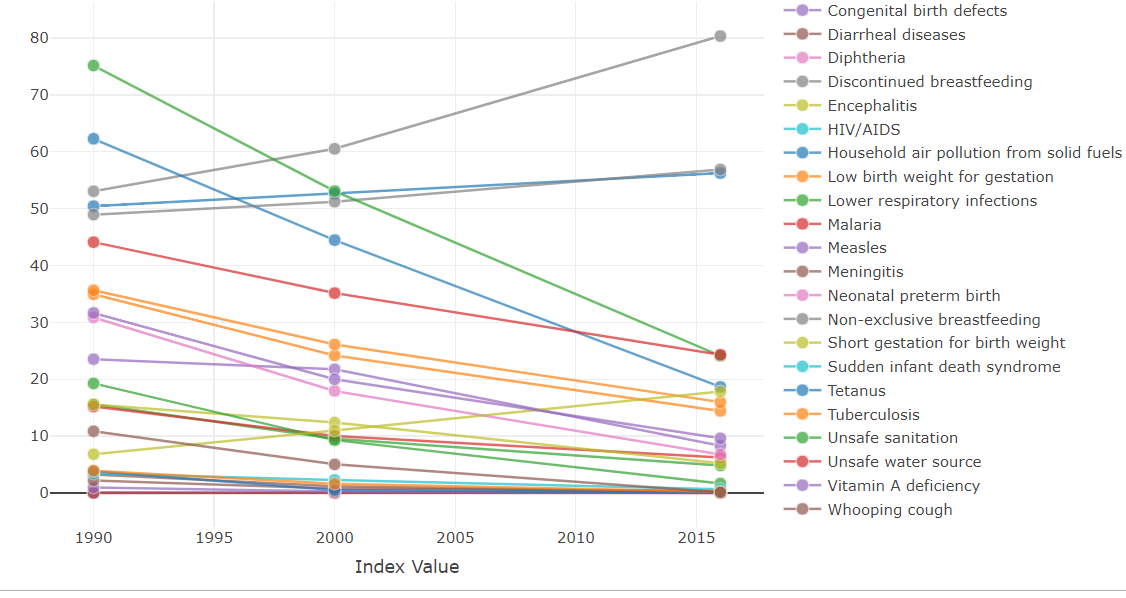